In [1]:
from plotly.subplots import make_subplots

import pandas as pd
import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
steam_games = pd.read_csv("./games-features-edit.csv")
steam_games_copy = steam_games.copy(deep=True) 

Steam is a video game digital storefront designed by Valve. Today, there are many operations you can do in Steam: buy games, sell in game items, make voice chats with friends and more.
As a  statistics and data analysis student, I came up with the idea to gather data from Steam and analyze it to find out the relation between price, users recommendations, Metacritic's rating and genres. In addition, I wanted to figure out whether Metacritic's opinion reflects Steam users opinions.

# Data Examination

In [3]:
steam_games.shape # data frame dimensions.

(12624, 19)

In [4]:
steam_games.head() # top rows

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [5]:
steam_games.tail() # bottom rows

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
12619,ObserVR Beta,Oct 26 2016,0,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12623,What The Heck Dude?,Nov 2 2016,0,0,False,False,True,True,False,True,False,False,True,True,False,False,False,False,0.00


In [6]:
steam_games.isnull().sum() # Detecting missing values.

ResponseName                    0
ReleaseDate                    86
Metacritic                      0
RecommendationCount             0
IsFree                          0
GenreIsNonGame                  0
GenreIsIndie                    0
GenreIsAction                   0
GenreIsAdventure                0
GenreIsCasual                   0
GenreIsStrategy                 0
GenreIsRPG                      0
GenreIsSimulation               0
GenreIsEarlyAccess              0
GenreIsFreeToPlay               0
GenreIsSports                   0
GenreIsRacing                   0
GenreIsMassivelyMultiplayer     0
PriceInitial                    0
dtype: int64

In [7]:
steam_games.info() # Checking columns data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

In [8]:
steam_games.describe()

,Metacritic,RecommendationCount,PriceInitial
count,12624.000000,1.262400e+04,12624.000000
mean,12.955640,1.245043e+03,9.290024
std,28.094054,1.560722e+04,14.164946
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,1.990000
50%,0.000000,0.000000e+00,5.990000
75%,0.000000,2.692500e+02,9.990000
max,96.000000,1.427633e+06,449.990000


From the first look on the data, the data felt inconvenient for me. In order to make analyzing easier while 
I changed it a bit so it'll be more readable and manageable.

## Making the data more convenient

In [9]:
def data_changer(data, group_geners=False):
    genre_list = []
    for index, row in data.iterrows():
        
        row_dct = row.to_dict() # changing every row to a dictionary.
        row_values = list(row_dct.values()) 
        row_keys = list(row_dct.keys())
        
        for i in range(len(row_values)):
            if row_values[i] == True:
                genre_list.append(row_keys[i].replace('GenreIs',''))
            if group_geners:
                if len(genre_list) == 1:
                    row_dct['Genre'] = genre_list[0] # when genre list has only one value.
                else:
                    row_dct['Genre'] = ', '.join(genre_list)
            
        data.loc[index] = pd.Series(row_dct) # updating the changed row in the data set.
        genre_list.clear() # removing all items in genre list.

In [10]:
def group_creator(data,col,group_col,num_of_groups):
    data[group_col] = None
    
    max_val = data[col].max() # max value of col
    min_val = data[col].min() # min value of col
    
    groups_list = list(range(min_val, max_val+1,max_val//num_of_groups)) # first num of every group
    dct_of_groups = {} # dict to hold all of the groups
    
    for i in range(len(groups_list)-1):
            if i == 0:
                dct_of_groups[str(groups_list[i])+'-'+str(groups_list[i+1])] = range(groups_list[i],groups_list[i+1]+1)
            elif i == len(groups_list) - 2:
                dct_of_groups[str(groups_list[i]+1)+'-'+str(max_val)] = range(groups_list[i],max_val+1)
            else:
                dct_of_groups[str(groups_list[i]+1)+'-'+str(groups_list[i+1])] = range(groups_list[i],groups_list[i+1]+1)

    for k,v in dct_of_groups.items():
        data.loc[data[col].isin(list(v)),group_col] = k 
    return

In [11]:
steam_games['Genre'] = None # Creating a genre column to reduce data set's columns.

steam_games.rename(columns = {'ResponseName' : 'Game',
                              'PriceInitial': 'Price',
                             'RecommendationCount' : 'Number of Recommendations'},
                               inplace=True) # Name changing.

# making sure IsFree's values won't interupt the process.
steam_games.loc[steam_games['IsFree'] == True, 'IsFree'] = False 

data_changer(steam_games,True) # making data convenient.

steam_games.loc[(steam_games['IsFree'] == False) & 
                (steam_games['Price'] == 0.00) ,'IsFree'] = True # Reverting IsFree column to it's original state.


steam_games = steam_games.drop(columns = [col for col in steam_games.columns 
                                          if 'GenreIs' in col]) # Remvoing unnecessary genre columns.

steam_games.drop_duplicates(subset = ["Game"],
                            keep='first', 
                            inplace = True) # Dealing with duplicates

# Counting the number of genres for every game.
steam_games['Number of Genres'] = steam_games['Genre'].apply(lambda value: len(value.split(', ')))

group_creator(steam_games, "Number of Recommendations", "Users Recommendations Groups", 50)
group_creator(steam_games, "Metacritic", "Metacritic Score Groups", 8)

### Data after changes:

In [12]:
steam_games.head(50)

,Game,ReleaseDate,Metacritic,Number of Recommendations,IsFree,Price,Genre,Number of Genres,Users Recommendations Groups,Metacritic Score Groups
0,Counter-Strike,Nov 1 2000,88,68991,False,9.99,Action,1,57105-85656,85-96
1,Team Fortress Classic,Apr 1 1999,0,2439,False,4.99,Action,1,0-28552,0-12
2,Day of Defeat,May 1 2003,79,2319,False,4.99,Action,1,0-28552,73-84
3,Deathmatch Classic,Jun 1 2001,0,888,False,4.99,Action,1,0-28552,0-12
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,4.99,Action,1,0-28552,0-12
5,Ricochet,Nov 1 2000,0,1965,False,4.99,Action,1,0-28552,0-12
6,Half-Life,Nov 8 1998,96,12486,False,9.99,Action,1,0-28552,85-96
7,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,9.99,Action,1,0-28552,61-72
9,Half-Life: Blue Shift,Jun 1 2001,71,2219,False,4.99,Action,1,0-28552,61-72
10,Half-Life 2,Nov 16 2004,96,35792,False,9.99,Action,1,28553-57104,85-96


First, I changed ResponseName to Game, RecommendationsCount to Number of Recommendations and InitalPrice to Price so the columns will be more readable. Second, I have created a Genre column and a Number of Generes column so I could easly see every game's genres and how many it has. At last, I created groups of users recommendations and Metacritic scores for future analysis.

# Users Recommendations Vs Metacritic

## Top 20 Free Games by Number of Recommendations

In [13]:
recommended_sort = steam_games.sort_values('Number of Recommendations', 
                                           ascending = False).reset_index().drop(columns = ['index'])

In [14]:
recommended_free_games=recommended_sort[recommended_sort['IsFree'] == True].drop(columns = ['IsFree','Price'])
recommended_free_games.head(20)

,Game,ReleaseDate,Metacritic,Number of Recommendations,Genre,Number of Genres,Users Recommendations Groups,Metacritic Score Groups
1,Dota 2,Jul 9 2013,90,590480,"Action, Strategy, FreeToPlay",3,571041-599592,85-96
2,Team Fortress 2,Oct 10 2007,92,383949,"Action, FreeToPlay",2,371177-399728,85-96
4,Unturned,Jul 7 2014,0,222301,"Indie, Action, Adventure, Casual, EarlyAccess,...",6,199865-228416,0-12
12,Warframe,Mar 25 2013,68,97562,"Action, FreeToPlay",2,85657-114208,61-72
19,Robocraft,Jul 8 2014,0,71023,"Indie, Action, RPG, Simulation, EarlyAccess, F...",7,57105-85656,0-12
26,Life Is Strange - Episode 1,Jan 29 2015,0,59864,"Action, Adventure",2,57105-85656,0-12
30,Heroes & Generals,Jul 11 2014,0,54072,"Indie, Action, EarlyAccess, FreeToPlay, Massiv...",5,28553-57104,0-12
42,No More Room in Hell,Oct 31 2013,0,42348,"Indie, Action, FreeToPlay",3,28553-57104,0-12
44,Trove,Jul 9 2015,0,40879,"Action, Adventure, Casual, RPG, FreeToPlay, Ma...",6,28553-57104,0-12
45,Loadout,Jan 31 2014,72,40106,"Indie, Action, FreeToPlay",3,28553-57104,73-84


## Top 20 Paid Games by Number of Recommendations

In [15]:
recommended_paid_games=recommended_sort[recommended_sort['IsFree'] == False].drop(columns=['IsFree','Price'])
recommended_paid_games.head(20)

,Game,ReleaseDate,Metacritic,Number of Recommendations,Genre,Number of Genres,Users Recommendations Groups,Metacritic Score Groups
0,Counter-Strike: Global Offensive,Aug 21 2012,83,1427633,Action,1,1399049-1427633,73-84
3,Garrys Mod,Nov 29 2006,0,237684,"Indie, Simulation",2,228417-256968,0-12
5,PAYDAY 2,Aug 13 2013,79,219763,"Action, RPG",2,199865-228416,73-84
6,The Elder Scrolls V: Skyrim,Nov 10 2011,94,182587,RPG,1,171313-199864,85-96
7,DayZ,Dec 16 2013,0,153350,"Indie, Action, EarlyAccess, MassivelyMultiplayer",4,142761-171312,0-12
8,Rust,Dec 11 2013,0,145688,"Indie, Action, Adventure, RPG, EarlyAccess, Ma...",6,142761-171312,0-12
9,Left 4 Dead 2,Nov 16 2009,89,140726,Action,1,114209-142760,85-96
10,Terraria,May 16 2011,83,139819,"Indie, Action, Adventure, RPG",4,114209-142760,73-84
11,Grand Theft Auto V,Apr 13 2015,96,136846,"Action, Adventure",2,114209-142760,85-96
13,ARK: Survival Evolved,Jun 2 2015,0,96815,"Indie, Action, Adventure, RPG, EarlyAccess, Ma...",6,85657-114208,0-12


## Top 20 Free Games by Metacritic

In [16]:
metacritic_sort = steam_games.sort_values('Metacritic', ascending=False).reset_index().drop(columns=['index'])

In [17]:
metacritic_free_games = metacritic_sort[metacritic_sort['IsFree'] == True].drop(columns=['IsFree','Price'])
metacritic_free_games.head(20)

,Game,ReleaseDate,Metacritic,Number of Recommendations,Genre,Number of Genres,Users Recommendations Groups,Metacritic Score Groups
27,Team Fortress 2,Oct 10 2007,92,383949,"Action, FreeToPlay",2,371177-399728,85-96
59,Dota 2,Jul 9 2013,90,590480,"Action, Strategy, FreeToPlay",3,571041-599592,85-96
99,Ori and the Blind Forest,Mar 10 2015,88,18387,Action,1,0-28552,85-96
109,HEX: Shards of Fate,Apr 19 2016,87,1026,"Adventure, Strategy, RPG, FreeToPlay",4,0-28552,85-96
132,Divinity: Original Sin (Classic),Jun 30 2014,87,11048,"Indie, Adventure, Strategy, RPG",4,0-28552,85-96
171,Tribes: Ascend,Jun 27 2012,86,7269,"Action, FreeToPlay",2,0-28552,85-96
181,Path of Exile,Oct 23 2013,86,33124,"Indie, Action, Adventure, RPG, FreeToPlay, Mas...",6,28553-57104,85-96
186,The Lord of the Rings Online,Jun 6 2012,86,5405,"RPG, FreeToPlay, MassivelyMultiplayer",3,0-28552,85-96
201,Sam & Max 204: Chariots of the Dogs,May 16 2008,85,0,Adventure,1,0-28552,85-96
242,PlanetSide 2,Nov 20 2012,84,32759,"Action, FreeToPlay, MassivelyMultiplayer",3,28553-57104,85-96


## Top 20 Paid Games by Metacritic

In [18]:
metacritic_paid_games = metacritic_sort[metacritic_sort['IsFree'] == False].drop(columns=['IsFree','Price'])
metacritic_free_games.head(20)

,Game,ReleaseDate,Metacritic,Number of Recommendations,Genre,Number of Genres,Users Recommendations Groups,Metacritic Score Groups
27,Team Fortress 2,Oct 10 2007,92,383949,"Action, FreeToPlay",2,371177-399728,85-96
59,Dota 2,Jul 9 2013,90,590480,"Action, Strategy, FreeToPlay",3,571041-599592,85-96
99,Ori and the Blind Forest,Mar 10 2015,88,18387,Action,1,0-28552,85-96
109,HEX: Shards of Fate,Apr 19 2016,87,1026,"Adventure, Strategy, RPG, FreeToPlay",4,0-28552,85-96
132,Divinity: Original Sin (Classic),Jun 30 2014,87,11048,"Indie, Adventure, Strategy, RPG",4,0-28552,85-96
171,Tribes: Ascend,Jun 27 2012,86,7269,"Action, FreeToPlay",2,0-28552,85-96
181,Path of Exile,Oct 23 2013,86,33124,"Indie, Action, Adventure, RPG, FreeToPlay, Mas...",6,28553-57104,85-96
186,The Lord of the Rings Online,Jun 6 2012,86,5405,"RPG, FreeToPlay, MassivelyMultiplayer",3,0-28552,85-96
201,Sam & Max 204: Chariots of the Dogs,May 16 2008,85,0,Adventure,1,0-28552,85-96
242,PlanetSide 2,Nov 20 2012,84,32759,"Action, FreeToPlay, MassivelyMultiplayer",3,28553-57104,85-96


In [19]:
def is_equal(data,other): 
    
    '''Checks equality between dataframes'''
    
    if not data.equals(other):
        print('Data frames do not equal each other.')
        return
    print('Data frames equal each other.')
    return

In [20]:
is_equal(metacritic_paid_games,recommended_paid_games)

Data frames do not equal each other.


In [21]:
is_equal(metacritic_paid_games,recommended_paid_games)

Data frames do not equal each other.


Comparing both data frames point that there's a difference between Metacritic's recommendation and steam users recommendation.

# Visualizations

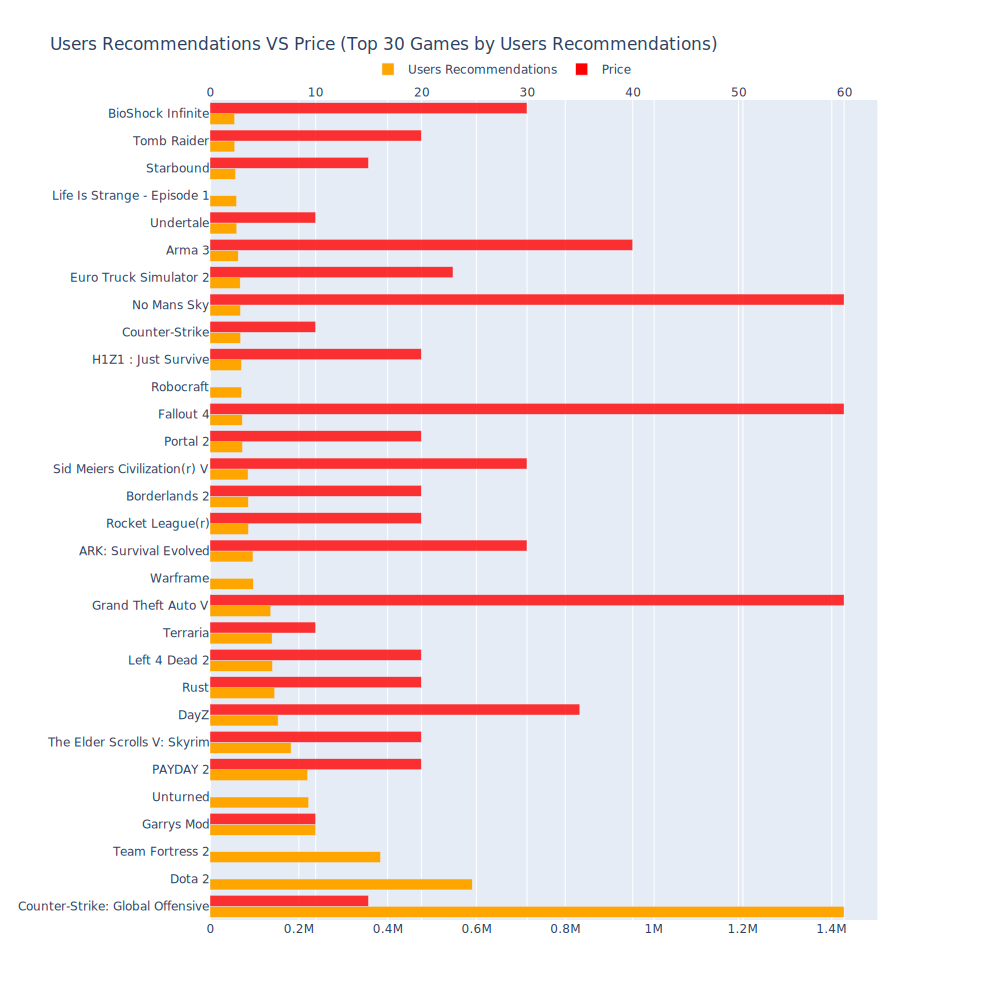

In [22]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
 
users_recommendations_bar = go.Bar(x=recommended_sort['Number of Recommendations'].head(30),
                y=recommended_sort['Game'].head(30),
                marker = dict(color = 'orange',opacity = 1),
                offsetgroup = 0,
                orientation = 'h',
                name = 'Users Recommendations' )

price_bar = go.Bar(x=recommended_sort['Price'].head(30),
                y=recommended_sort['Game'].head(30),
                marker = dict(color = 'red',opacity = 0.8),
                offsetgroup = 1,
                orientation = 'h',
                name = 'Price')

fig.update_layout({'barmode':'group'},
                  height=1000,
                  width = 1000,
                  xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'}, # second x axis.
                  title='Users Recommendations VS Price (Top 30 Games by Users Recommendations)',
                 legend = dict(orientation = 'h',
                              yanchor = 'bottom',
                              y= 1.02,
                              xanchor = 'right',
                              x =0.6))

fig.add_trace(users_recommendations_bar)
fig.add_trace(price_bar)

fig.data[1].update(xaxis='x2')

fig.show()

As the graph shows, there are three free games in the top five games by users recommendations. 
Does that mean users don't judge a game by it's price or does that mean there are more users who prefer free to play games instead of pay to play games? One more thing the graph shows is that price isn't affected by the game's amount of users recommendation. Because in addition to the 3 free games that are on top, we can see Grand Theft Auto, Fallout etc fall behind in their amount of users recommendation but their price is still high which proves that price isn't affected by the amount of users recommendations.

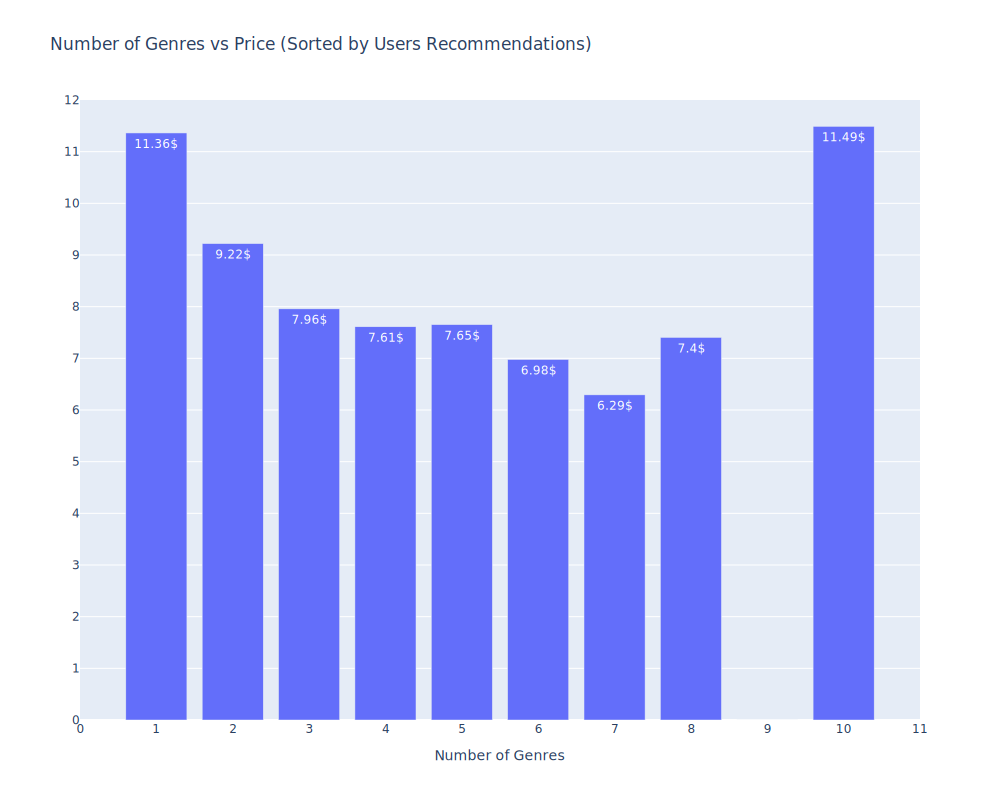

In [23]:
def price_changer(data, func= None):
    
    dct = {}
    
    if func == None: 
        col = data["Price"]
    if func == "mean":
        col = data["Price"].mean()
        
    for k,v in col.to_dict().items():
            dct[k] = str(round(v,2)) + '$'
            
    return pd.Series(data = dct)

fig = go.Figure()


genres_num_vs_price = go.Bar(x=recommended_sort.groupby("Number of Genres")["Number of Genres"].mean(),
                y=recommended_sort.groupby("Number of Genres")["Price"].mean(),
                   text = price_changer(recommended_sort.groupby("Number of Genres"),"mean"),
                   name = "Price Avg")


fig.update_layout(height=800,
                  width = 1000,
                  title='Number of Genres vs Price (Sorted by Users Recommendations)')

fig.update_xaxes(range=[0,11],
                nticks = 12,
                title_text = "Number of Genres ")
fig.update_yaxes(range=[0,12],
                nticks = 13)

fig.add_trace(genres_num_vs_price)

fig.show()

Does the price is affected by the number of genres? Ignoring the games 10 genres, we can tell that the number of genres doesn't make the price higher. In fact cost of games with only 1 genre is 11.36$ on average.
So far, I haven't really find something that point on a strong effect on the price.

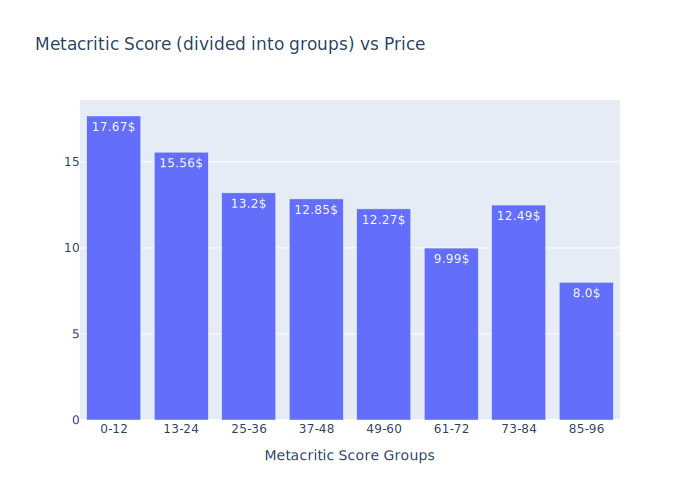

In [24]:
fig = go.Figure()

metacritic_score_groups_bar = go.Bar(x = metacritic_sort["Metacritic Score Groups"].unique(),
              y = metacritic_sort.groupby("Metacritic Score Groups")["Price"].mean(),
              text = price_changer(steam_games.groupby("Metacritic Score Groups"),"mean"))
    
               
fig.update_layout(title = "Metacritic Score (divided into groups) vs Price")
fig.update_xaxes(type = "category", categoryorder='array', title_text = "Metacritic Score Groups" ,
                 categoryarray= ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84', '85-96'])
fig.add_trace(metacritic_score_groups_bar)
fig.show()

After dividing games into groups of Metacritic's scores, I can clearly tell that on average games that have low score are more expensive. Which means that neither Metacritic score has an effect on the price of the game. However, the graph shows that Metacritic does not judge the games by their price and thats ש point of similarity between them and the users. 

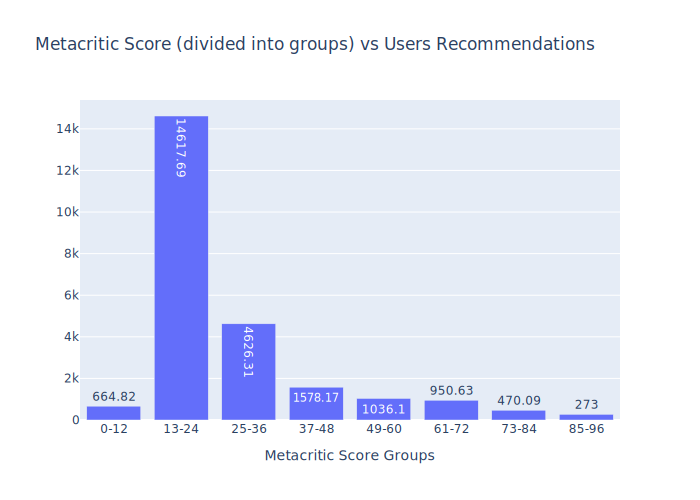

In [25]:
fig = go.Figure()

users_recommendations_groups_bar = go.Bar(x = recommended_sort["Metacritic Score Groups"].unique(),
              y = recommended_sort.groupby("Metacritic Score Groups")["Number of Recommendations"].mean(),
              text = round(recommended_sort.groupby("Metacritic Score Groups")["Number of Recommendations"].mean(),2))
    
               
fig.update_layout(title = "Metacritic Score (divided into groups) vs Users Recommendations")
fig.update_xaxes(categoryorder='array', 
                  title_text = "Metacritic Score Groups",
                 categoryarray= ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73-84', '85-96'],
                  )
fig.add_trace(users_recommendations_groups_bar)
fig.show()

Does the point of similarty tell the whole story? I think not. The graph clearly shows that users prefer games with 13-24 Metacritic score.Therefore, there's no way Metacritic reflect the users opinions because the company reflect only the opinions of itself. So forth when you're going to buy a game, make sure you check the amount of users recommendation and not only the Metacritic score it has.

## Genres Comparsion

In [26]:
columns = steam_games_copy.columns.to_list()

columns[0] = "Game"
columns[-1] = "Price"
columns[3] = "Number of Recommendations"
for i in range(len(columns)):
    if "GenreIs" in columns[i]:
        columns[i] = columns[i].replace("GenreIs","")
steam_games_copy.columns = columns

In [27]:
genres = steam_games_copy.columns.to_list()[5:18]
price_average = []
recommendations_average = []
metacritic_average = []
for i in range(len(genres)):
    price_average.append(steam_games_copy.loc[steam_games_copy[genres[i]]==True,"Price"].mean())
    recommendations_average.append(steam_games_copy.loc[steam_games_copy[genres[i]]==True,"Number of Recommendations"].mean())
    metacritic_average.append(steam_games_copy.loc[steam_games_copy[genres[i]]==True,"Metacritic"].mean())
genres_dct = {"Genres":genres,
              "Average Price":price_average,
              "Average Recommendations":recommendations_average,
              "Average Metacritic Score":metacritic_average}


In [28]:
genres_data_frame = pd.DataFrame(data=genres_dct)
genres_sorted_by_price = genres_data_frame.sort_values("Average Price",ascending=False)
genres_sorted_by_recommendations = genres_data_frame.sort_values("Average Recommendations",ascending=False)
genres_sorted_by_metacritic = genres_data_frame.sort_values("Average Metacritic Score",ascending=False)

genres_data_frame

,Genres,Average Price,Average Recommendations,Average Metacritic Score
0,NonGame,36.599832,146.187919,0.000000
1,Indie,7.587789,778.958036,9.880005
2,Action,8.795234,2145.872340,15.170589
3,Adventure,9.046731,1143.820475,13.207468
4,Casual,6.098825,419.788497,4.672855
5,Strategy,10.227415,1047.776227,17.452333
6,RPG,9.565547,1713.242317,15.042317
7,Simulation,10.867426,1105.002030,9.435025
8,EarlyAccess,9.476805,1162.000757,0.177896
9,FreeToPlay,0.080305,4797.400322,7.573955


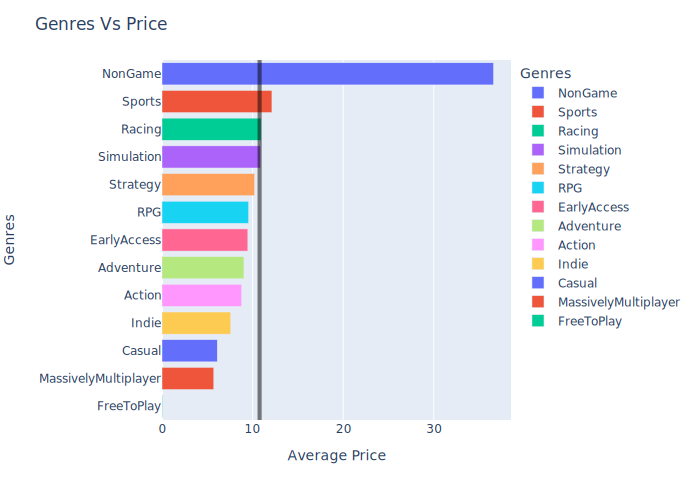

In [29]:
fig = px.bar(genres_sorted_by_price, x="Average Price", y="Genres", color="Genres")
fig.add_vrect(x0=11, x1=genres_sorted_by_price["Average Price"].mean(),
              fillcolor="black", opacity=0.5, line_width=0)
fig.update_layout(title = "Genres Vs Price")
fig.show()

It seems that compared to other games, NonGame games are the most expesive ones followed by sports, racing and simulation games. Due to nonGame games being by far the most expensive games, I can tell that genre has an influence on price.

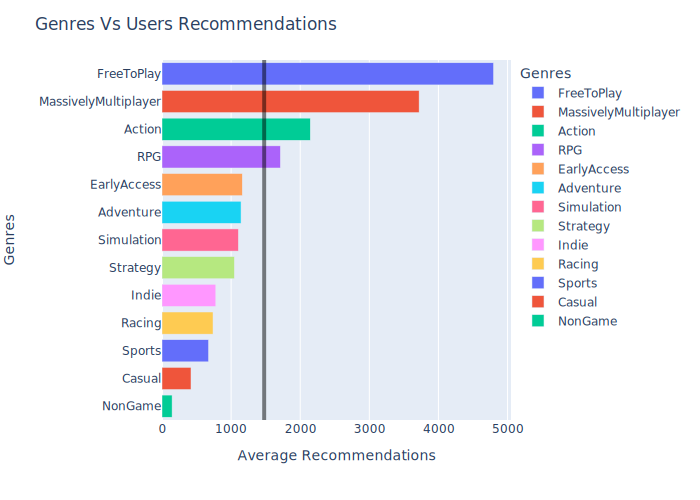

In [30]:
fig = px.bar(genres_sorted_by_recommendations, x="Average Recommendations", y="Genres", color="Genres")
fig.add_vrect(x0=1450, x1=genres_sorted_by_recommendations["Average Recommendations"].mean(),
              fillcolor="black", opacity=0.5, line_width=0)
fig.update_layout(title = "Genres Vs Users Recommendations")
fig.show()

With no doubt, most users prefer free to play games. This explains the reason why there are three free games at the top when sorting by users recommendations. Additionally, I can also point on the genres users prefer less.
Genres like sports, casual , non-game , racing etc, are genres that users prefer less. 

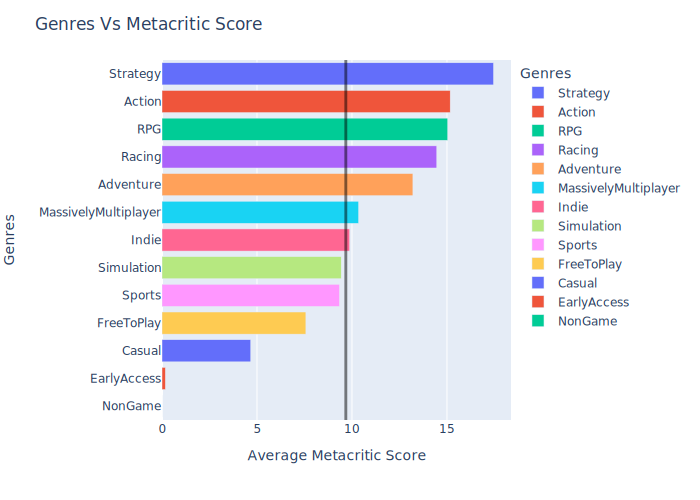

In [31]:
fig = px.bar(genres_sorted_by_metacritic, x="Average Metacritic Score", y="Genres", color="Genres")
fig.add_vrect(x0=9.6, x1=genres_sorted_by_metacritic["Average Metacritic Score"].mean(),
              fillcolor="black", opacity=0.5, line_width=0)
fig.update_layout(title = "Genres Vs Metacritic Score")
fig.show()

Unsuprisingly, Metacritic's rating does not match with users opinions. Genres like strategy and racing that above the mean of average Metacritic score are below the mean of average users recommendations. Yet again Metacritic doesn't reflect users choices.

To conclude all of my work, I'll start by saying that Metacritic's rating does not reflect Steam users opinions Therefore before buying a game, it's worth checking what does the users say. Second, it seems that NonGame games are the most expensive ones which means a genre might has an effect on the price. Third, a game's rating / recommendations does not determine whether the price will be high or low.